In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Mining_Prj/phase_1/GooglePlay.csv')
df = pd.read_csv('./GooglePlay.csv')
df1 = pd.read_csv('./Playstore_final.csv')

df.head()

C:\Users\Elham\AppData\Local\Temp\ipykernel_13984\2465176378.py:3: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./Playstore_final.csv')


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
df1.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10841.0,5420.000000,3129.671468,0.0,2710.0,5420.0,8130.0,10840.0
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [80]:
# Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price,
# Content Rating, Genres, Last Updated, Current Ver, Android Ver
df = df.drop(columns='Unnamed: 0')
df = df.drop(df.index[10472])

for col in ['Reviews',	'Size',	'Installs',	'Price']:
  # extract numbers
  df[col] = df[col].str.extract('(\d+)')

  # cast as int
  df[col] = df[col].dropna().astype('int')

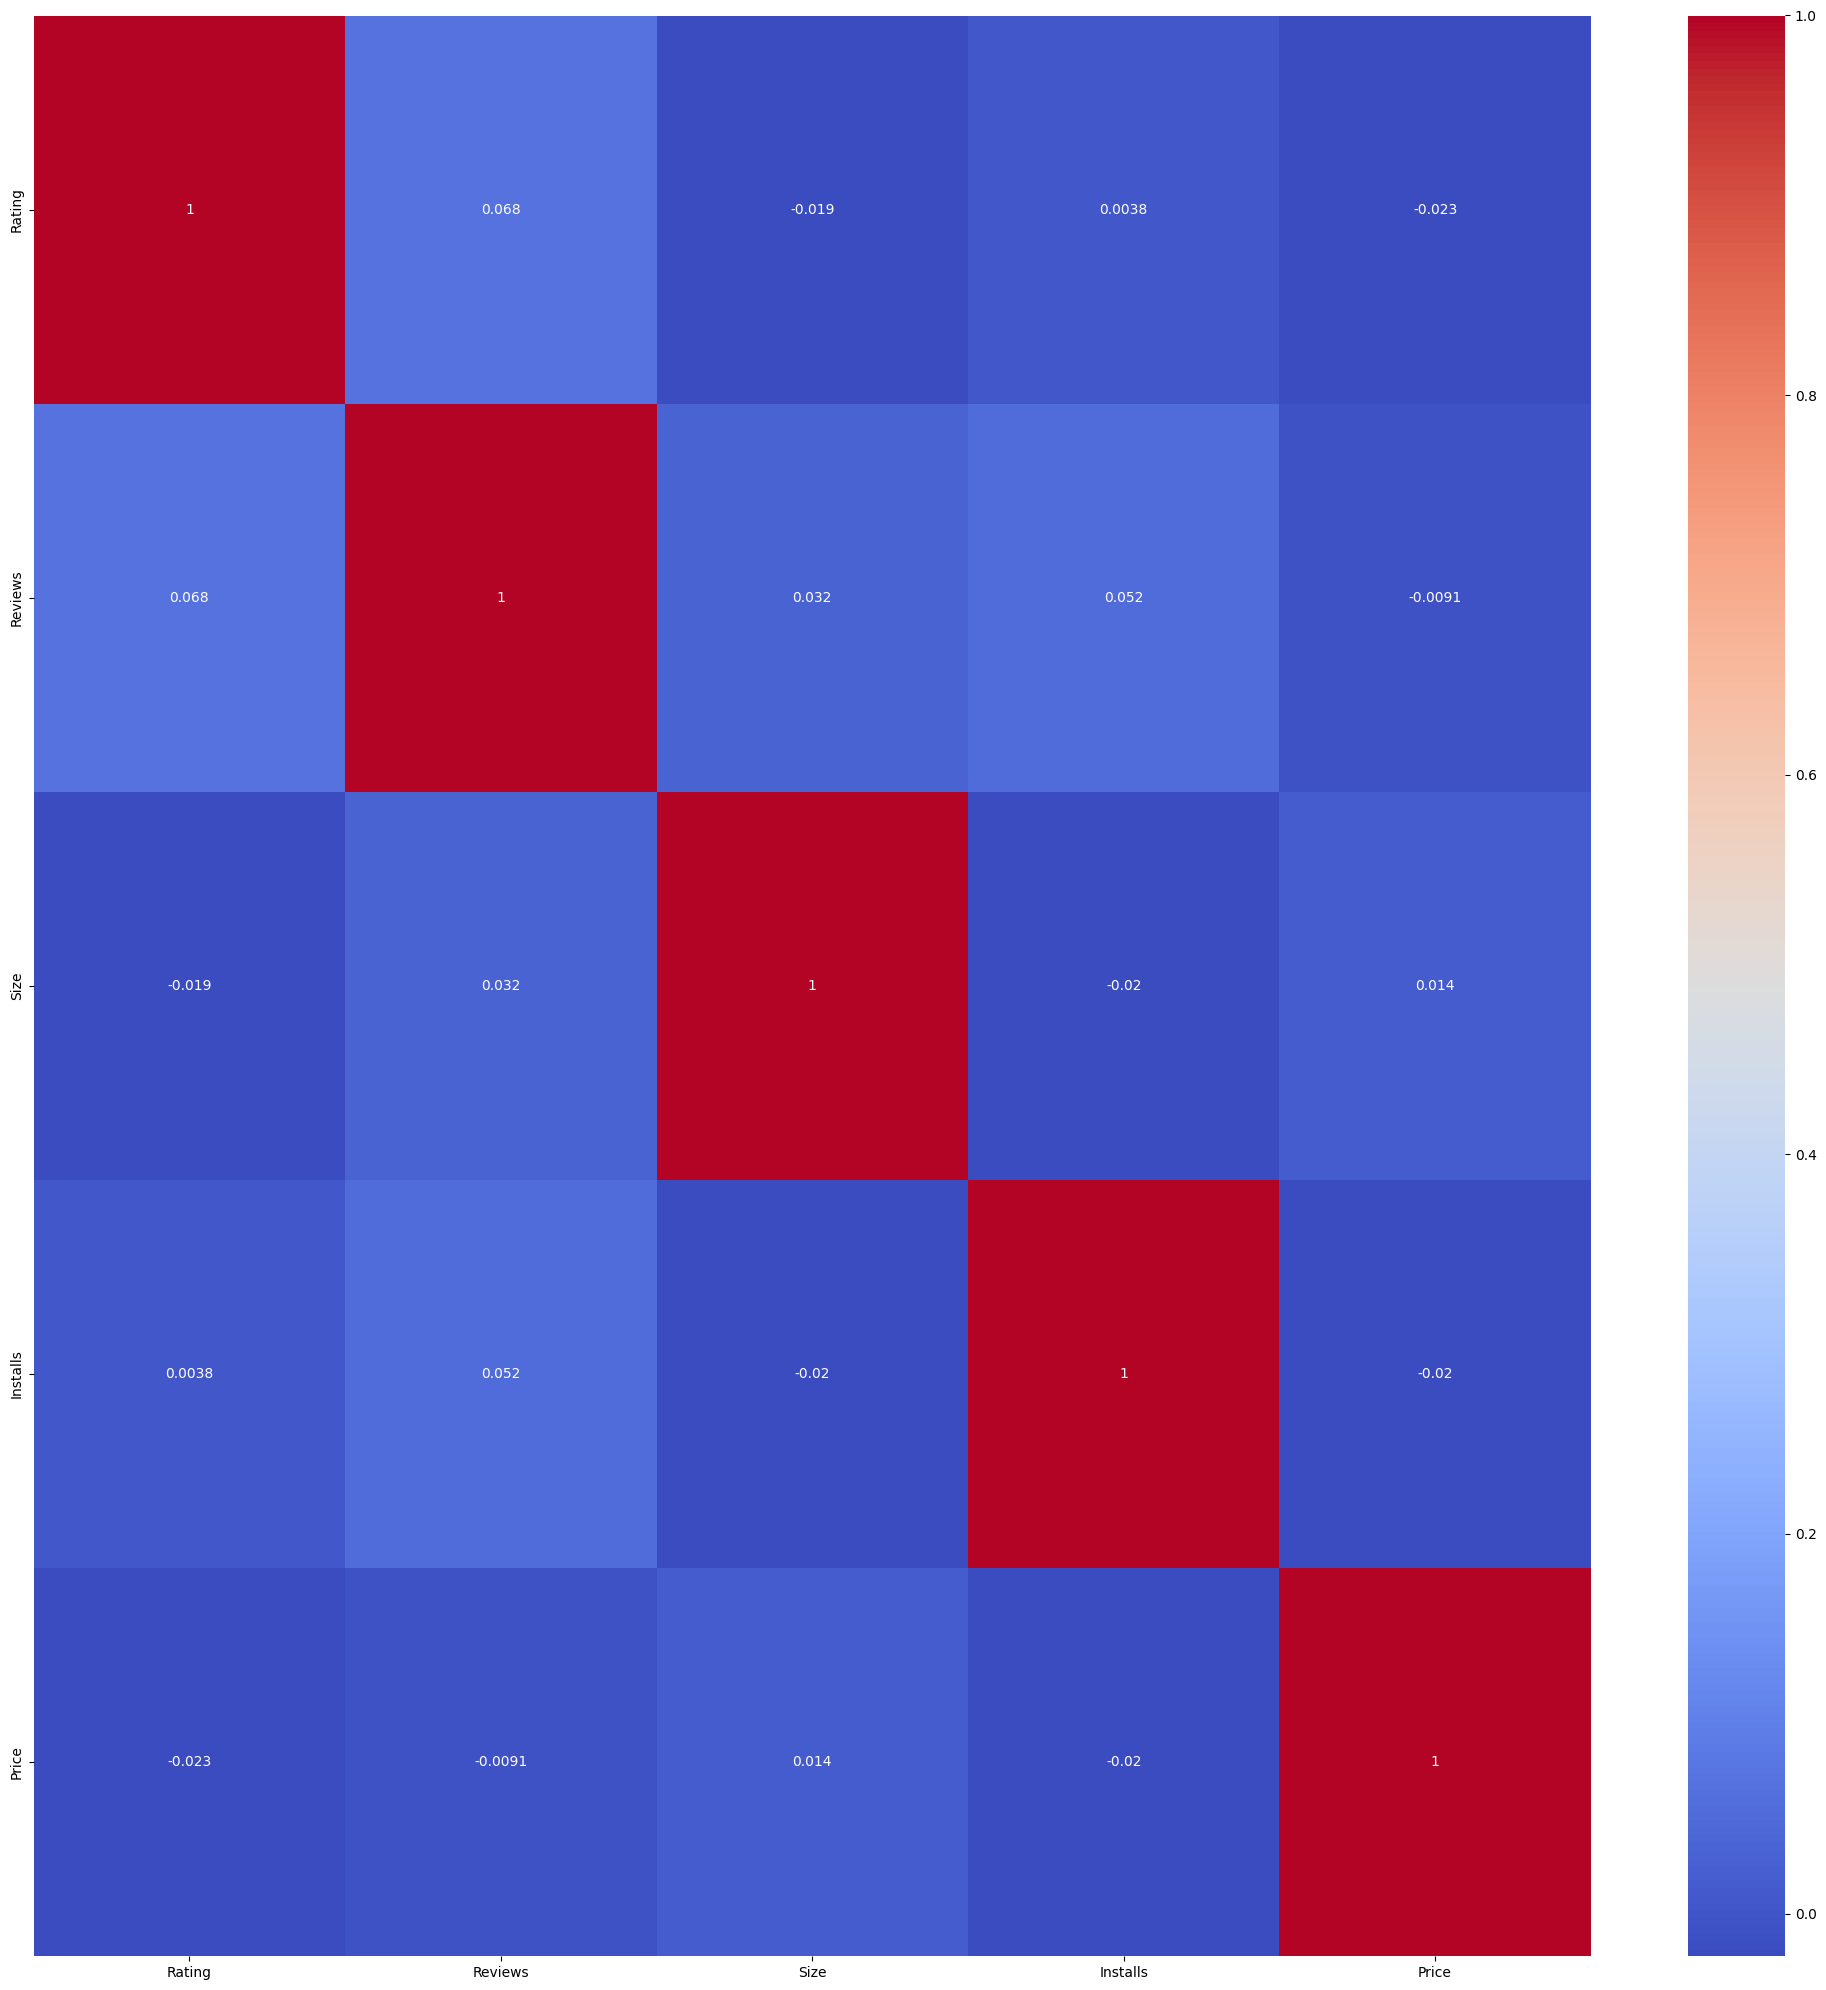

In [81]:
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

## Part 1 - Knowing the dataset

In [82]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.0,5,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.0,100,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [89]:
df1.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000,10000,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000,1000,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000,10000,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000,5000,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000,50000,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'df'
unnamed_cols = [col for col in df1.columns if 'Unnamed' in col]  # Find unnamed columns
df1.drop(unnamed_cols, axis=1, inplace=True)  # Drop unnamed columns

# Verify the result
print(df1.columns)


Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last update', 'Privacy Policy',
       'Content Rating', 'Ad Supported', 'In app purchases', 'Editor Choice',
       'Summary', 'Reviews', 'Android version Text', 'Developer',
       'Developer Address', 'Developer Internal ID', 'Version'],
      dtype='object')


In [101]:
# print(df1['Currency'].unique())
# print(df1['Minimum Android'].unique())
# print(df1['Developer Id'].unique())
# print(df1['Developer Website'].unique())
# print(df1['Developer Email'].unique())
# print(df1['Last update'].unique())
# print(df1['Rating Count'].unique())

# print(df1['Rating' ].unique())
# print(df1['Minimum Installs'].unique())
# print(df1['Price'].unique())
print(df1['Reviews'].unique())
print(df1[ 'Developer Internal ID'].unique())
print(df1[ 'Installs'].unique())
print(df1[ 'Size'].unique())

[   28     3     7 ... 12754 12579  7764]
[-2.14748365e+09  0.00000000e+00]
[     10000       1000       5000      50000     100000         10
     500000    1000000          5        100          0        500
   10000000    5000000  500000000   50000000         50  100000000
          1 1000000000  705032704 1410065408]
['5.8M' '5.3M' '5.7M' ... '801k' '332M' '6.8k']


In [121]:


#df1['Size'] = df1['Size'].str.replace(',', '').str.replace('+', '').fillna('0').astype('int64')

df1['Minimum Installs'] = df1['Minimum Installs'].fillna(0).astype(int)
df1['Reviews'] = df1['Reviews'].fillna(0).astype(int)
df1['Developer Internal ID'] = df1['Developer Internal ID'].fillna(0).astype(int)
df1['Installs'] = df1['Installs'].fillna(0).astype(int)
df1['Rating'] = df1['Rating'].fillna(0).astype(int)
# df1['Size'] = df1['Size'].fillna(0).astype(int)
df1['Price'] = df1['Price'].fillna(0).astype(int)

import numpy as np

def convert_size(size):
  try:
    unit = size[-1].upper()  # Extract unit (M or k)
    value = float(size[:-1].replace(',', ''))  # Extract numeric value
    if unit == 'M':
      return value * 1024  # Convert megabytes to kilobytes
    elif unit == 'K':
      return value / 1024
    else:
      return np.nan  # Handle invalid units
  except ValueError:
    return np.nan  # Handle conversion errors

df1['Size'] = df1['Size'].apply(convert_size)
df1['Size'] = df1['Size'].fillna(0).astype('int')


In [131]:
print(df1['Size'].unique())
print(df1['Price'].unique())

[   5939    5427    5836    6041    9523    5734   27648    9113    6963
   21504   13312    7168   19456   25600    6656    6860    7372    7065
    6758   71680       0   24576   23552   39936   50176   38912   57344
   64512   68608   53248   45056   46080   56320   91136   83968   60416
   16384   41984    4710    5120    4915   58368   52224   54272   70656
   26624   30720   17408   18432   20480   28672   14336   31744   79872
   78848   22528    9318   11264   34816   32768   29696  828416   48128
   61440   76800   75776   36864   82944   37888   69632    8806    5017
    7475   86016   81920   94208   55296   66560   35840    6348    8704
   63488    3788    4608  102400    9830  109568   62464   43008   88064
  114688  119808  134144    7680   95232  115712    9728    5529  121856
   59392   51200   40960   74752   12288   15360   65536    2252   33792
   90112    6553    7782    9011   97280  105472    6451    6144    9625
  150528   80896   49152   67584    8294    7987  1

In [126]:
def analyze_dataset1(dataset):
    results = []
    Nominal = ['App Name', 'App Id', 'Category', 'Summery', 'Developer', 'Developer Address', 'Developer Email', 'Developer Website', 'Developer ', 'Privacy Policy']
    Ordinal = ['Content Rating', 'Last Updated', 'Minimum Android', 'Android Versio text', 'Version']
    Numeric = ['Rating', 'Minimum Installs', 'Price', 'Reviews', 'Developer Internal ID', 'Installs', 'Size']

    for column_name, column_data in dataset.items():
        # Initialize variables
        range_val = None
        min_val = None
        max_val = None
        mean_val = None
        mode = None
        median_val = None
        outliers = None

        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)

        if any(column_name == i for i in Nominal):
            data_type = "Nominal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif any(column_name == i for i in Ordinal):
            data_type = "Ordinal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name == "Type":
            data_type = "Binary"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif any(column_name == i for i in Numeric):
            # Numeric column
            data_type = "Numeric"
            column_data = column_data.astype(str).str.replace('+', '').str.replace(',', '')

            column_data = column_data.astype(float)

            range_val = column_data.max() - column_data.min()
            min_val = column_data.min()
            max_val = column_data.max()
            mean_val = column_data.mean()
            mode = column_data.mode()[0]
            median_val = column_data.median()

            # Outliers
            data_std = column_data.std()
            q1 = column_data.quantile(0.25)
            q3 = column_data.quantile(0.75)
            iqr = q3 - q1
            outliers = column_data[(column_data < q1 - 1.5 * iqr) | (column_data > q3 + 1.5 * iqr)].tolist()

        # Save results for this column
        results.append({
            "Name": column_name,
            "Type": data_type,
            "Range": range_val,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "Mode": mode,
            "Median": median_val,
            "Outlier": outliers
        })

    # Create a new DataFrame with the results
    df1_results = pd.DataFrame(results)

    return df1_results


In [127]:
analyze_dataset1(df1)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,App Name,Nominal,NaN,NaN,NaN,NaN,Solitaire,NaN,None
1,App Id,Nominal,NaN,NaN,NaN,NaN,com.softdroid.oppo.Fthree.launcher.theme,NaN,None
2,Category,Nominal,NaN,NaN,NaN,NaN,Education,NaN,None
3,Rating,Numeric,5.000000e+00,0.000000e+00,5.000000e+00,2.650455e+00,4.0,3.000000e+00,[]
4,Rating Count,float64,NaN,NaN,NaN,NaN,None,NaN,None
5,Installs,Numeric,1.410065e+09,0.000000e+00,1.410065e+09,7.121175e+05,10000.0,5.000000e+03,"[500000.0, 1000000.0, 1000000.0, 1000000.0, 50..."
6,Minimum Installs,Numeric,3.147484e+09,-2.147484e+09,1.000000e+09,6.029816e+05,10000.0,5.000000e+03,"[500000.0, 1000000.0, 1000000.0, 1000000.0, 50..."
7,Free,object,NaN,NaN,NaN,NaN,None,NaN,None
8,Price,Numeric,4.000000e+02,0.000000e+00,4.000000e+02,2.618513e-01,0.0,0.000000e+00,"[6.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, ..."
9,Currency,object,NaN,NaN,NaN,NaN,None,NaN,None


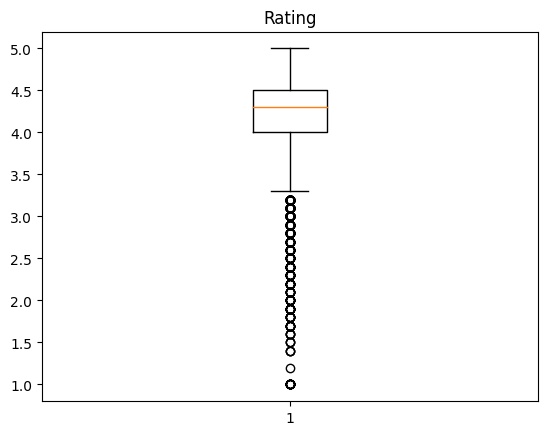

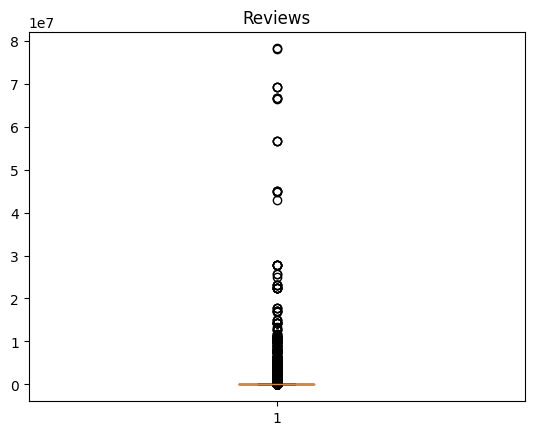

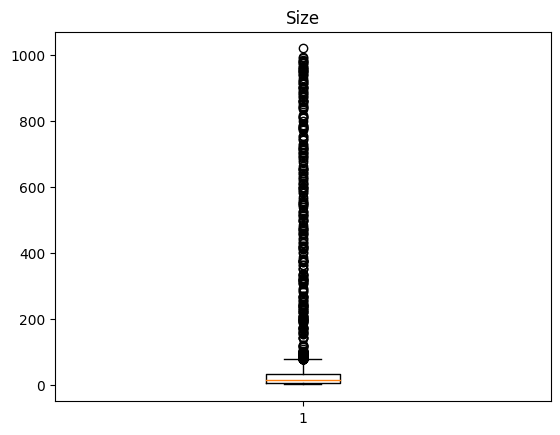

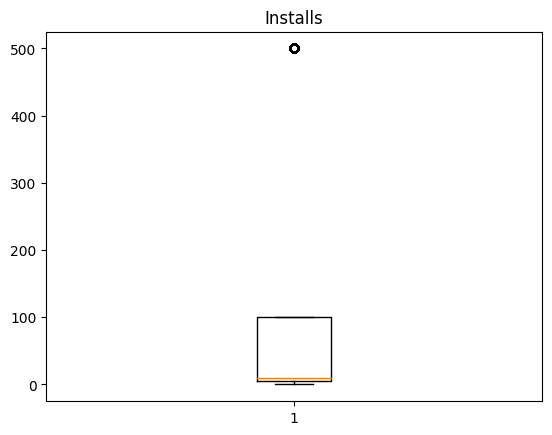

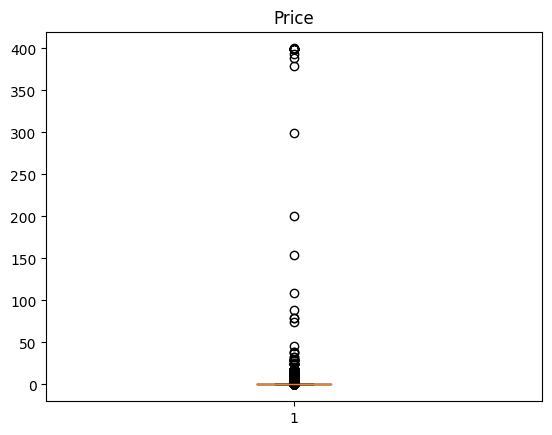

In [ ]:
# numeric = ["Size", ]
numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    # Create a box plot
    plt.boxplot(df[feature].dropna())
    # Add a title
    plt.title(feature)
    # Show the plot
    plt.show()

In [129]:
analyze_dataset(df)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,App,object,NaN,NaN,NaN,NaN,None,NaN,None
1,Category,Nominal,NaN,NaN,NaN,NaN,FAMILY,NaN,None
2,Rating,Numeric,4.0,1.0,5.0,4.191757,4.4,4.3,[]
3,Reviews,Numeric,78158306.0,0.0,78158306.0,444152.896033,0,2094.0,"[967, 87510, 215644, 967, 36815, 13791, 13880,..."
4,Size,Numeric,1019.0,1.0,1020.0,36.857846,3.0,15.0,[]
5,Installs,Numeric,500.0,0.0,500.0,72.411070,10,10.0,[]
6,Type,Binary,NaN,NaN,NaN,NaN,Free,NaN,None
7,Price,Numeric,400.0,0.0,400.0,0.961808,0,0.0,"[4, 4, 4, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 5, 3, ..."
8,Content Rating,Ordinal,NaN,NaN,NaN,NaN,Everyone,NaN,None
9,Genres,object,NaN,NaN,NaN,NaN,None,NaN,None


## Part 2 - Data Evaluation

### Creditability

In [128]:
# Numeric
expected_ranges = {
    'Rating': (1, 5),
    'Size': (1.0, 50.0),
    'Reviews': (0.0, 100000.0),
    'Size': (0.0, 50.0),
    'Installs': (0.0, 100.0),
    'Price': (0.0, 5.0),
    
}

for feature, (min_value, max_value) in expected_ranges.items():

    valid_data = df[(df[feature] >= min_value) & (df[feature] <= max_value)]
    creditability_percentage = (len(valid_data) / len(df)) * 100

    print(f"The percentage of creditability for '{feature}' is: {creditability_percentage}%")

The percentage of creditability for 'Rating' is: 86.40221402214023%
The percentage of creditability for 'Size' is: 71.78044280442805%
The percentage of creditability for 'Reviews' is: 79.99077490774907%
The percentage of creditability for 'Installs' is: 91.31918819188192%
The percentage of creditability for 'Price' is: 98.62546125461255%


### ‫‪Currency‬‬

In [ ]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")
filtered_df = df[df['Last Updated'].dt.year.between(2015, 2018)]
update_counts_per_year_filtered = filtered_df['Last Updated'].dt.year.value_counts().sort_index()
update_percentages_per_year_filtered = (update_counts_per_year_filtered / filtered_df.shape[0]) * 100
print(update_percentages_per_year_filtered)


درصد به‌روزرسانی برای سال‌های 2015 تا 2018:
Last Updated
2015     4.380189
2016     7.672488
2017    17.816586
2018    70.130738
Name: count, dtype: float64


C:\Users\Elham\AppData\Local\Temp\ipykernel_3512\2474724690.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")


In [ ]:
total_rows = df.shape[0]
non_null_percentage = df.notnull().sum() / total_rows * 100
print("Non-Null Percentage by Column:")
print(non_null_percentage)

Non-Null Percentage by Column:
App               100.000000
Category          100.000000
Rating             86.402214
Reviews           100.000000
Size               84.363469
Installs          100.000000
Type               99.990775
Price             100.000000
Content Rating    100.000000
Genres            100.000000
Last Updated      100.000000
Current Ver        99.926199
Android Ver        99.981550
dtype: float64


In [ ]:
total_values = df.shape[0] * df.shape[1]
total_null_values = df.isnull().sum().sum()
total_non_null_values = total_values - total_null_values
accuracy = total_non_null_values / total_values
print(f"Total Values: {total_values}")
print(f"Total Null Values: {total_null_values}")
print(f"Total Non-Null Values: {total_non_null_values}")
print(f"Accuracy (Non-Null Percentage): {accuracy:.3f}")


Total Values: 140920
Total Null Values: 3180
Total Non-Null Values: 137740
Accuracy (Non-Null Percentage): 0.977


## Part 3 - Preprocessing

In [ ]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### It seems like our dataset is already free of missing values, so there's no need to perform any missing value handling.

In [ ]:

Triglycerides_norm = (df["Triglycerides"] - df["Triglycerides"].min(axis=0)) / (df["Triglycerides"].max(axis=0) - df["Triglycerides"].min(axis=0))
df['Triglycerides'] = Triglycerides_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
BMI_norm = (df["BMI"] - np.mean(df["BMI"])) / np.std(df["BMI"])
df["BMI"] = BMI_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
HeartRate_norm = (df["Heart Rate"] - np.mean(df["Heart Rate"])) / np.std(df["Heart Rate"])
df["Heart Rate"] = HeartRate_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,-0.147042,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,1.118179,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,-0.147042,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,-0.098380,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,0.874867,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
scaler = StandardScaler()
df[['Age', 'Cholesterol']] = scaler.fit_transform(df[['Age', 'Cholesterol']])
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,0.625557,Male,-0.641579,158/88,-0.147042,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,-1.539322,Male,1.596895,165/93,1.118179,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,-1.539322,Female,0.793023,174/99,-0.147042,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,1.425621,Male,1.522691,163/100,-0.098380,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,0.578495,Male,0.718820,91/88,0.874867,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,Male,-0.641579,158/88,-0.147042,0,0,1,0,...,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,-1.539322,Male,1.596895,165/93,1.118179,1,1,1,1,...,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,-1.539322,Female,0.793023,174/99,-0.147042,1,0,0,0,...,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,1.425621,Male,1.522691,163/100,-0.098380,1,1,1,0,...,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,0.578495,Male,0.718820,91/88,0.874867,1,1,1,1,...,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [ ]:
bp = []
for i in df['Blood Pressure']:
    a=i.split('/')[0]
    b=i.split('/')[1]
    bp.append(float(a)/float(b))
df['Blood Pressure']=pd.Series(bp)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,Male,-0.641579,1.795455,-0.147042,0,0,1,0,...,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,-1.539322,Male,1.596895,1.774194,1.118179,1,1,1,1,...,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,-1.539322,Female,0.793023,1.757576,-0.147042,1,0,0,0,...,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,1.425621,Male,1.522691,1.630000,-0.098380,1,1,1,0,...,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,0.578495,Male,0.718820,1.034091,0.874867,1,1,1,1,...,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


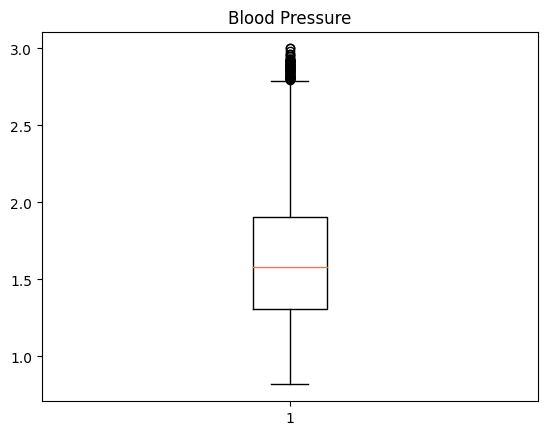

In [ ]:
plt.boxplot(df['Blood Pressure'])
    # Add a title
plt.title('Blood Pressure')
# Show the plot
plt.show()

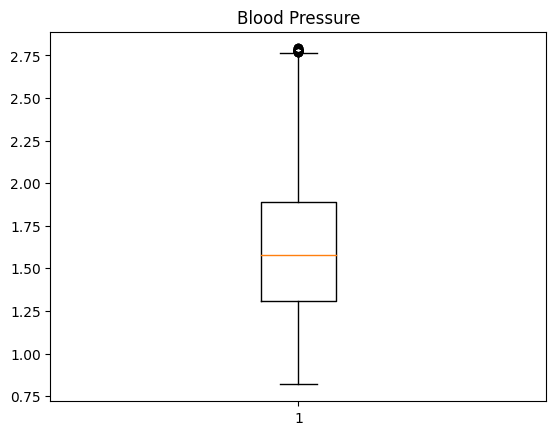

In [ ]:
Q1 = df['Blood Pressure'].quantile(0.25)
Q3 = df['Blood Pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Blood Pressure'] >= lower_bound) & (df['Blood Pressure'] <= upper_bound)]
plt.boxplot(df['Blood Pressure'])
plt.title('Blood Pressure')
plt.show()

In [ ]:
df=df.drop(['Blood Pressure', 'Country', 'Continent', 'Hemisphere'], axis=1)
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,1,-0.641579,-0.147042,0,0,1,0,0,...,9,6.615001,261404,0.373454,0.332468,0,6,0,158,88
1,CZE1114,-1.539322,1,1.596895,1.118179,1,1,1,1,1,...,1,4.963459,285768,-0.268479,0.266234,1,7,0,165,93
2,BNI9906,-1.539322,0,0.793023,-0.147042,1,0,0,0,0,...,9,9.463426,235282,-0.113134,0.723377,4,4,0,174,99
3,JLN3497,1.425621,1,1.522691,-0.098380,1,1,1,0,1,...,9,7.648981,125640,1.198524,0.451948,3,4,0,163,100
4,GFO8847,0.578495,1,0.718820,0.874867,1,1,1,1,0,...,6,1.514821,160555,-1.120826,0.261039,1,5,0,91,88


In [ ]:
def count_word(word, column):
  words = df[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'Heart Attack Risk'
frequency_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')
word = '1'
column = 'Heart Attack Risk'
frequency_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "0" appears 5624 times in the column "Heart Attack Risk".
The word "1" appears 3139 times in the column "Heart Attack Risk".
